In [15]:
import numpy as np
import matplotlib.pyplot as plt

from TimeConvert import TimeConvert as tc

from scipy.io import wavfile

METHOD 1:
Shifting in timedomain and substracting signals.
Samples shift: 88
Timeshift: 0.00199546485260771


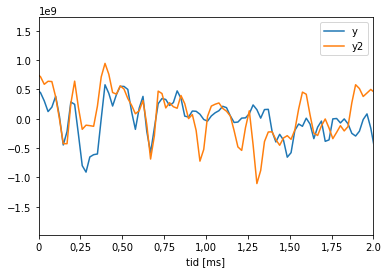

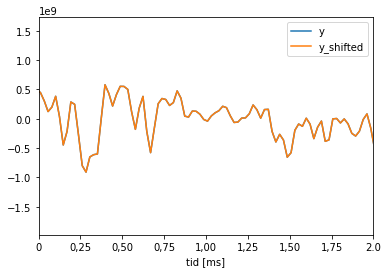

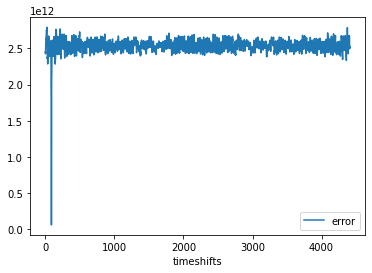

Wall time: 1.03 s


In [28]:
%%time

# Load wav files.
samplerate_y, y = wavfile.read('audio_input/602msTo702ms.wav')
samplerate_y2, y2 = wavfile.read('audio_input/600msTo700ms.wav')
#samplerate_y, y = wavfile.read('audio_input/Mic1.wav')
#samplerate_y2, y2 = wavfile.read('audio_input/Mic0.wav')

y2_shifted = y2

# Define time steps for shifting.
dt = (1/samplerate_y)

# Number of samples.
n = len(y) #512

# Calculate time length.
lengthY = (1/samplerate_y) * len(y)

# Generate x axis for plots.
time = np.linspace((-n * dt)/2, (n * dt)/2, n)

### METHOD 1 - Shifting and substracting signals, least squared method###
# Scan possible time-shifts
error = [] # Array for storing errors
# Too be explained.

#timeshifts = np.arange(-n/2,n/2,1) 
timeshifts = np.arange(0, n, 1)
for ts in timeshifts:
    y2_shifted = np.roll(y2_shifted,-1) 
    tempSubtract = np.subtract(y2_shifted, y, dtype='float64')
    tempPower = np.abs(tempSubtract, dtype='float64')
    ##pPower = np.square(np.array(tempSubtract),dtype='int64')
    tempSum = np.sum(tempPower, dtype='float64')
    error.append(tempSum)
    #print(tempSum)
#the results - the timeshift index with least error between the two signals 
tsSamples_final = timeshifts[np.argmin(error)] + 1

#cae+1 timeshift sample number:
tsTime_final = tsSamples_final * dt
print("METHOD 1:")
print("Shifting in timedomain and substracting signals.")
print("Samples shift: " + str(tsSamples_final))
print("Timeshift: " + str(tsTime_final))

## Plot result
y2_shifted = np.roll(y2,-tsSamples_final)

## Plot results from method 1 ##
plt.figure(0)
plt.plot(time, y, label="y")
plt.plot(time, y2, label="y2")
plt.xlabel("tid [ms]")
plt.xticks([0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125, 0.0015, 0.00175, 0.002],['0','0,25','0,50','0,75','1,00','1,25','1,50','1,75','2,0'])
plt.legend()
plt.xlim(0,0.002)

plt.figure(1)
plt.plot(time, y, label="y")
plt.plot(time, y2_shifted, label="y_shifted")
plt.xlabel("tid [ms]")
plt.xticks([0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125, 0.0015, 0.00175, 0.002],['0','0,25','0,50','0,75','1,00','1,25','1,50','1,75','2.0'])
plt.legend()
plt.xlim(0,0.002)

plt.figure(2) 
plt.plot(timeshifts, error, label="error")
plt.xlabel("timeshifts")
plt.legend()
plt.show()